# **Lecture 17 K-Means Clustering Algorithm**

## Introduction

K-Means is one of the simplest and most popular unsupervised machine learning algorithms. The goal of the K-Means algorithm is to find groups in the data, with the number of groups represented by the variable `K`. The algorithm works iteratively to assign each data point to one of `K` groups based on the features that are provided. Data points are clustered based on feature similarity.

### Key Concepts

- **Clusters**: Groups of similar data points.
- **Centroids**: The center point of each cluster.
- **Euclidean Distance**: A measure of the distance between two points in Euclidean space, used to assign data points to the nearest cluster.

## Algorithm Steps

1. **Initialization**: Start by randomly selecting `K` centroids. The centroids can either be randomly chosen from the dataset or randomly generated within the data range.
2. **Assignment**: Assign each data point to the nearest centroid. The "nearest" is determined by calculating the Euclidean distance between the data point and each centroid.
3. **Update**: Calculate the new centroids as the mean of all data points assigned to each cluster.
4. **Repeat**: Repeat the assignment and update steps until the centroids no longer change significantly, indicating that the algorithm has converged.



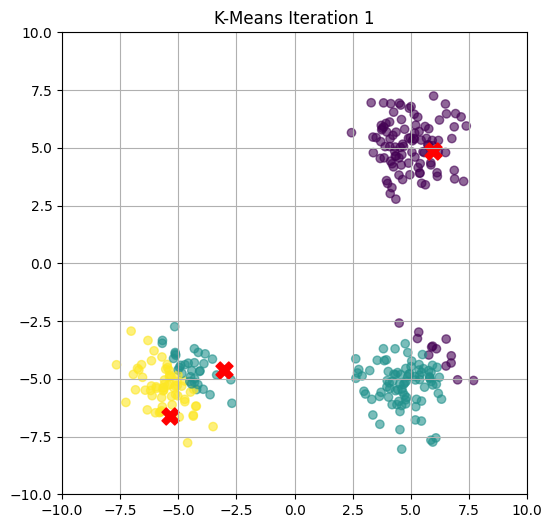

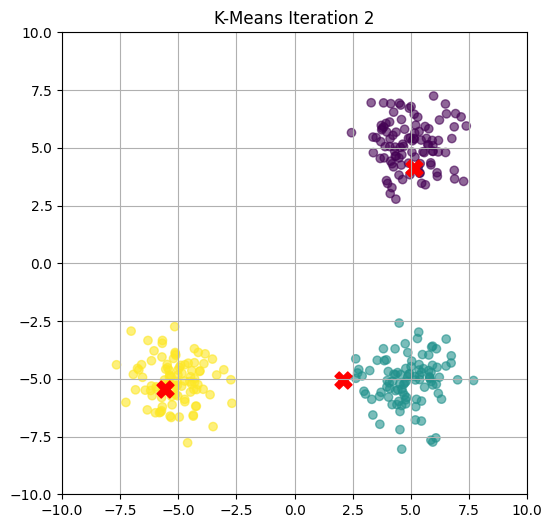

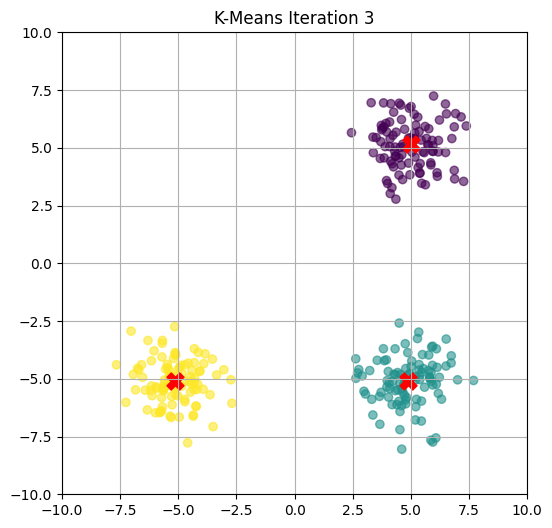

Convergence achieved after 3 iterations.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.vstack([
    np.random.randn(100, 2) + [5, 5],
    np.random.randn(100, 2) + [-5, -5],
    np.random.randn(100, 2) + [5, -5],
])

# Initialize centroids randomly
k = 3
centroids = X[np.random.choice(len(X), k, replace=False)]

# Function to plot current clusters and centroids
def plot_clusters(X, centroids, labels, iteration):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150, marker='X')
    plt.title(f'K-Means Iteration {iteration}')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid()
    plt.show()

# K-means step-by-step demonstration
max_iterations = 10
for iteration in range(max_iterations):
    # Step 1: Assignment - Assign points to nearest centroid
    distances = np.sqrt(((X[:, np.newaxis, :] - centroids)**2).sum(axis=2))
    labels = np.argmin(distances, axis=1)

    # Plot after assignment
    plot_clusters(X, centroids, labels, iteration+1)

    # Step 2: Update - Compute new centroids
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    # Check for convergence (centroids do not change significantly)
    if np.allclose(centroids, new_centroids, atol=1e-4):
        print(f'Convergence achieved after {iteration+1} iterations.')
        break

    centroids = new_centroids
else:
    print('Reached maximum iterations without full convergence.')


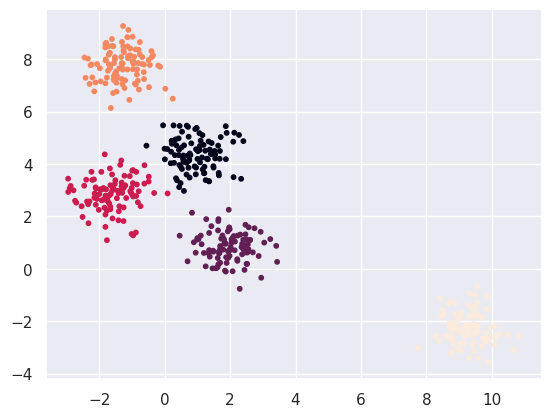

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=500,
                  centers=5,
                  cluster_std=0.60,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=10);

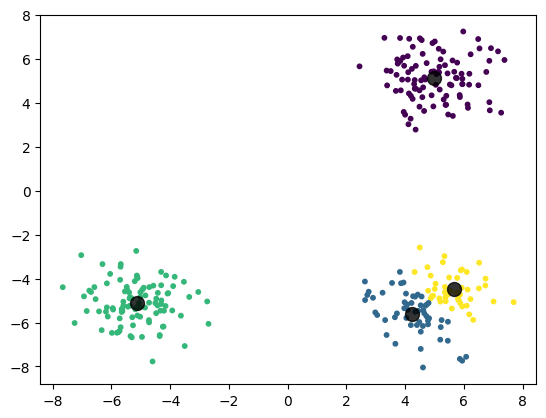

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8);

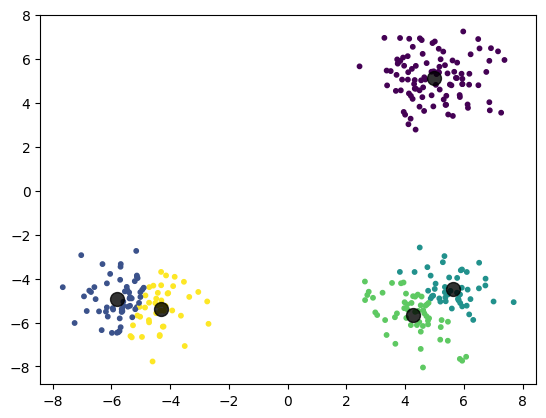

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8);

K-Means is a widely used clustering algorithm due to its simplicity and efficiency. Here are some of the key advantages and disadvantages of using K-Means:

### Pros

1. **Simplicity and Speed**: K-Means is straightforward to understand and easy to implement. Its computational efficiency makes it suitable for large datasets.
2. **Scalability**: With optimizations such as the Elkan algorithm, K-Means can be scaled to work with very large datasets.
3. **Adaptability**: It can work well on a wide range of data types and is used across different domains, from image segmentation to market segmentation.
4. **Well-Studied**: As one of the most researched clustering algorithms, there are many variations and improvements available, making it adaptable to different scenarios.
5. **Feature Space Reduction**: K-Means can reduce the feature space, making it useful in preprocessing steps for other algorithms.

### Cons

1. **Choice of K**: The algorithm requires the number of clusters to be specified in advance, which can be a significant drawback if the optimal number of clusters is not known beforehand.
- **Elbow Method**:
Compute the sum of squared errors (SSE) or inertia for different values of K.
Plot SSE against K.
Choose K at the "elbow" point, where adding additional clusters does not substantially improve the SSE.
- **Silhouette Analysis**:
Measures how well each point fits within its assigned cluster compared to other clusters.
Silhouette Score ranges from -1 (poor fit) to +1 (perfect fit). Higher scores indicate better-defined clusters.
2. **Sensitivity to Initial Conditions**: The final clusters can vary based on the initial choice of centroids. Poor initialization can lead to suboptimal solutions.
3. **Assumption of Spherical Clusters**: K-Means assumes that clusters are spherical and evenly sized, which might not always be the case, leading to poor performance on elongated or irregularly shaped clusters.
4. **Outliers**: The presence of outliers can skew the calculation of centroids and lead to misleading clusters.
5. **Difficulty with Different Densities**: K-Means struggles with clusters of varying densities, often incorrectly partitioning data belonging to dense clusters.
6. **Local Minima**: The algorithm can converge to a local minimum, which might not be the global optimal solution for the clustering.

### Mitigating Some Cons

- **Choice of K**: Techniques like the Elbow Method or the Silhouette Score can help in determining a good value for K.
- **Sensitivity to Initial Conditions**: Multiple runs of the algorithm with different initializations, or smart initialization methods like K-Means++, can mitigate the impact of initial conditions.
- **Assumptions and Outliers**: Preprocessing the data to remove outliers, or using variations of K-Means like K-Medoids, which are less sensitive to outliers, can improve results.

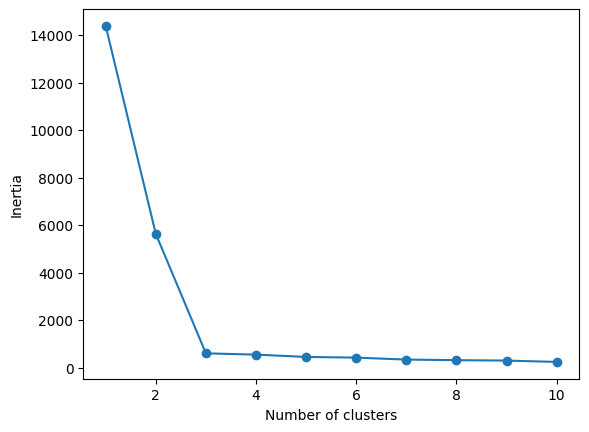

In [4]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Kernelized K-means:
One version of this kernelized k-means is implemented in Scikit-Learn within the SpectralClustering estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


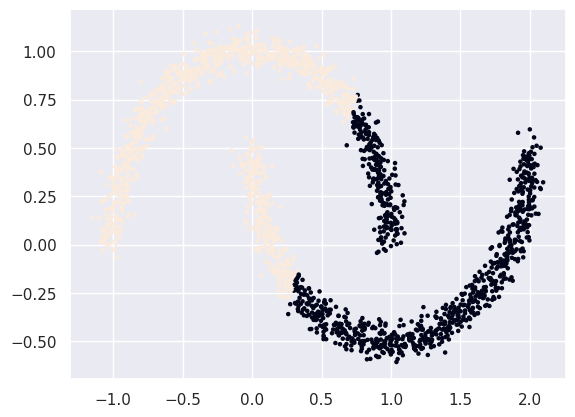

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(2000, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5);

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


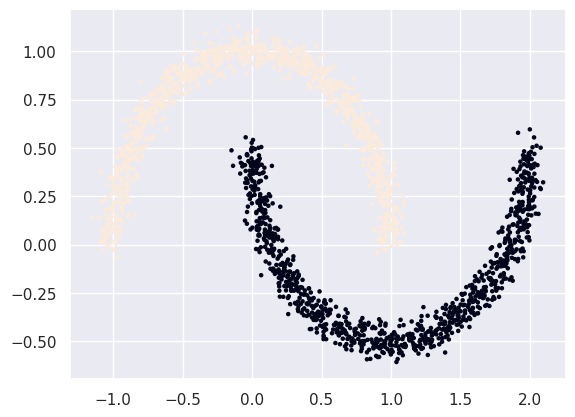

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,
                           affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5);

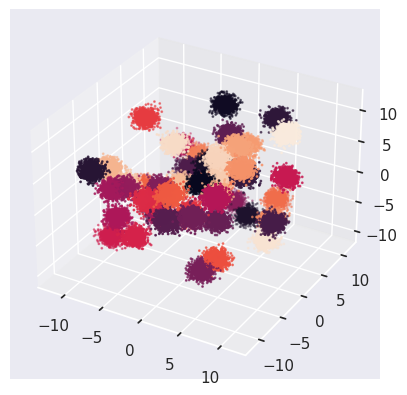

In [ ]:
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=50000,
                  n_features=3,
                  centers=50,
                  cluster_std=0.60,
                  random_state=0)

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:,2], c=y, s=1);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


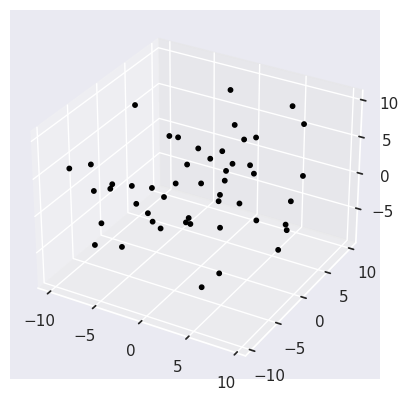

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=50)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

ax = plt.subplot(projection='3d')
centers = kmeans.cluster_centers_
ax.scatter3D(centers[:, 0], centers[:, 1], centers[:,2], c='black', s=10, alpha=1);

## Image classification

Mounted at /content/drive


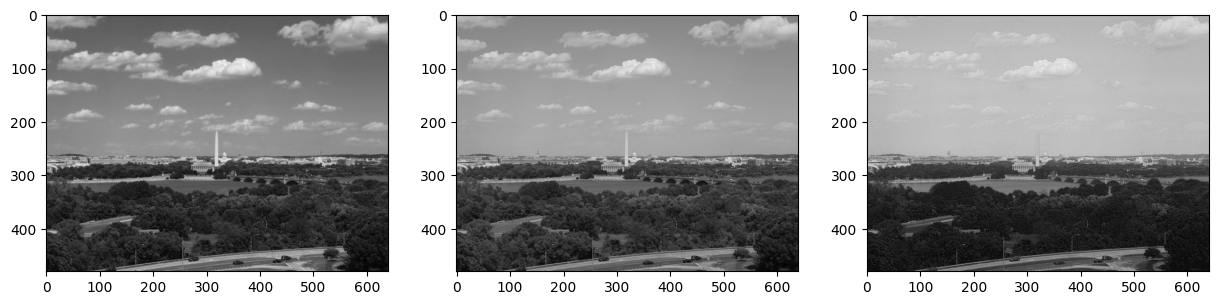

In [5]:
import matplotlib.image as mpimg

from google.colab import drive
drive.mount('/content/drive')

filedir = '/content/drive/MyDrive/Teaching/FWE458_Spring2025/Lec17/'
fname = filedir + 'nationalcapital_2017_06_02_150108.jpeg'

img = mpimg.imread(fname)

a,b,c=img.shape
X = np.empty((a*b,3))
fig, ax = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(0,3):
    ax[i].imshow(img[:,:,i], cmap='gray')
    X[:,i]=img[:,:,i].flatten()

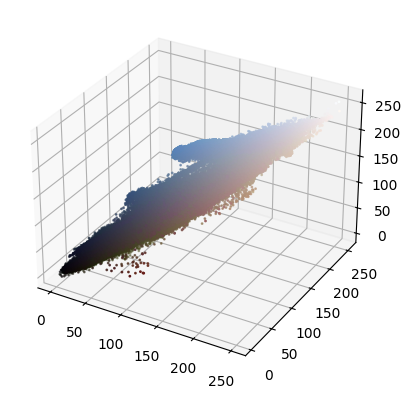

In [8]:
ax = plt.subplot(projection='3d')

# Normalize each dimension to [0, 1] for RGB mapping
colors = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

ax.scatter3D(X[:,0], X[:, 1], X[:,2], c = colors, s=1);

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

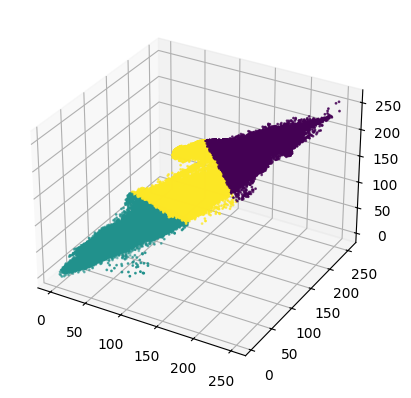

In [14]:
ax = plt.subplot(projection='3d')

ax.scatter3D(X[:,0], X[:, 1], X[:,2], c = y_kmeans, s=1);

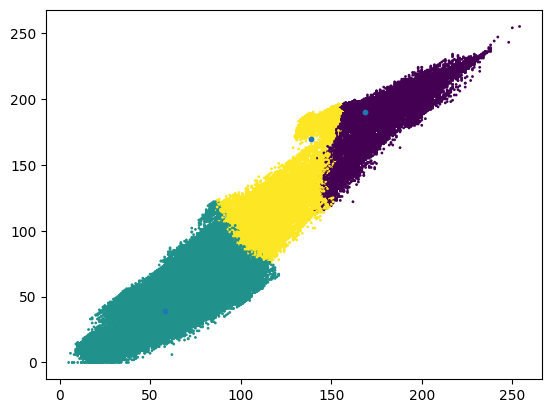

In [15]:
plt.scatter(X[:, 1], X[:, 2], s=1, c=y_kmeans);
plt.scatter(centers[:, 1], centers[:, 2], s=10);

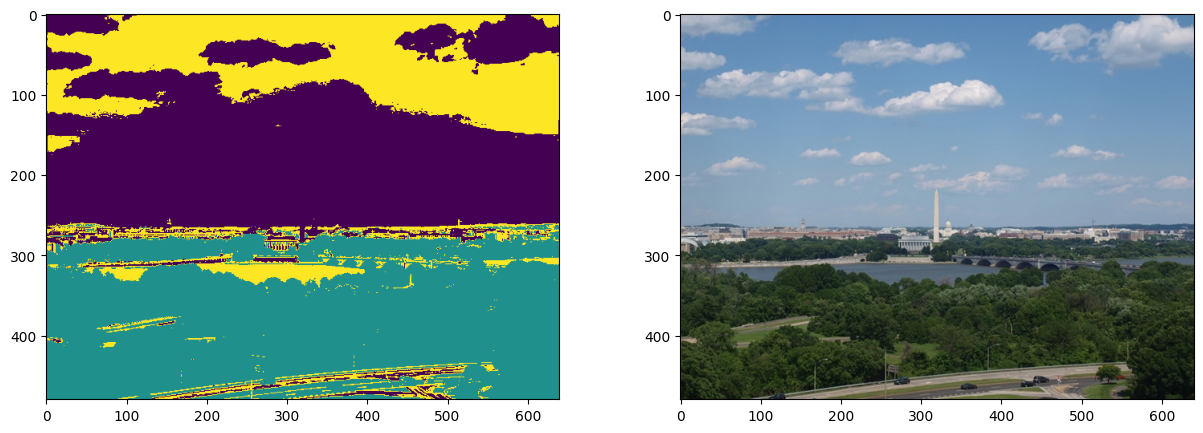

In [16]:
yimg = np.reshape(y_kmeans, (a,b))

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].imshow(yimg)
ax[1].imshow(img)

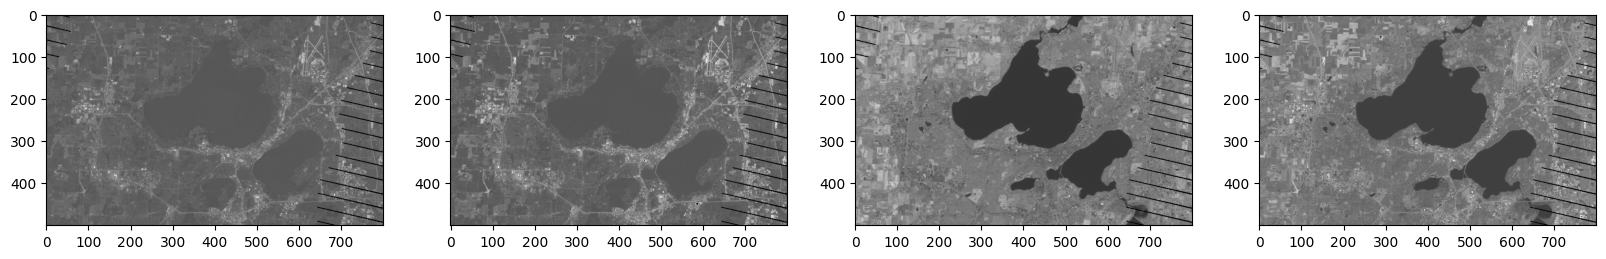

In [17]:
import matplotlib.image as mpimg
B2 = mpimg.imread(filedir + 'LE07_L2SP_024030_20100826_20200910_02_T1_SR_B2.tif')
#B2 = B2.astype(np.float)
B2[B2==B2.max()]=0

B3 = mpimg.imread(filedir + 'LE07_L2SP_024030_20100826_20200910_02_T1_SR_B3.tif')
#B3 = B3.astype(np.float)
B3[B3==B3.max()]=0

B4 = mpimg.imread(filedir + 'LE07_L2SP_024030_20100826_20200910_02_T1_SR_B4.tif')
#B4 = B4.astype(np.float)
B4[B4==B4.max()]=0

B5 = mpimg.imread(filedir + 'LE07_L2SP_024030_20100826_20200910_02_T1_SR_B5.tif')
#B5 = B5.astype(np.float)
B5[B5==B5.max()]=0

x1=3800
x2=4300
y1=3700
y2=4500

B2 = B2[x1:x2,y1:y2]
B3 = B3[x1:x2,y1:y2]
B4 = B4[x1:x2,y1:y2]
B5 = B5[x1:x2,y1:y2]

fig, ax = plt.subplots(1,4,figsize=(20,5))
ax[0].imshow(B2, cmap='gray')
ax[1].imshow(B3, cmap='gray')
ax[2].imshow(B4, cmap='gray')
ax[3].imshow(B5, cmap='gray')


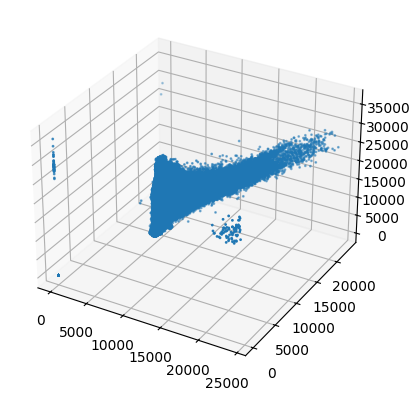

In [18]:
a,b = B2.shape
X = np.empty((a*b,3))
X[:,0]=B2.flatten()
X[:,1]=B3.flatten()
X[:,2]=B4.flatten()

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:,0], X[:, 1], X[:,2], s=1);

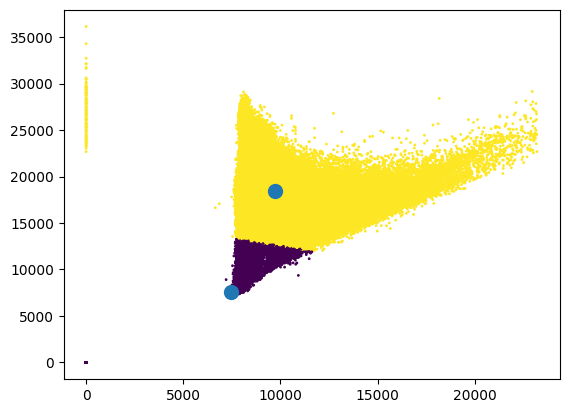

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.scatter(X[:, 1], X[:, 2], s=1, c=y_kmeans);
plt.scatter(centers[:, 1], centers[:, 2], s=100);

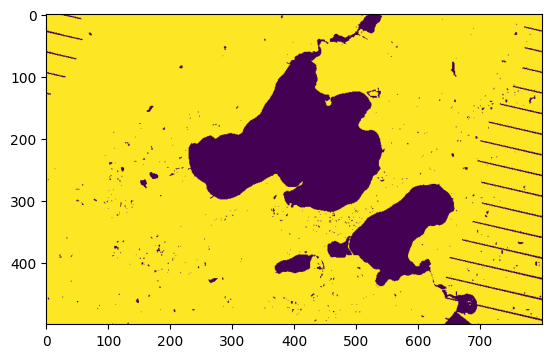

In [20]:
yimg = np.reshape(y_kmeans, (a,b))
plt.imshow(yimg)